# Dataset preparation

In [1]:
import pandas as pd

In [2]:
# Get the embeddings
embeddings = pd.read_csv("data/OsmoticStress_with_binary_positions_and_embeddings.csv", index_col=0)
embeddings = embeddings.drop(columns=["full_sequence"])

# Get the dataset
df = pd.read_csv('data/OsmoticStress_with_binary_positions.csv')
df.drop(columns=['full_sequence', 'Peptide_sequence'], inplace=True)
df.set_index('Uniprot_ID', inplace=True)

# Merge the two and get the final dataset
dataset = df.merge(embeddings, left_index=True, right_index=True)

In [3]:
dataset.head()

,Log2FC(LiP_norm),Binary_Positions,full_embedding
Uniprot_ID,,,
P15703,-2.176707,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.012820357456803322, -0.04501103237271309, ..."
P15703,0.285029,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.012820357456803322, -0.04501103237271309, ..."
P15703,-0.498240,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.012820357456803322, -0.04501103237271309, ..."
P15703,0.348193,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.012820357456803322, -0.04501103237271309, ..."
P15703,-0.434615,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[-0.012820357456803322, -0.04501103237271309, ..."


In [4]:
import re

def convert_to_list(number_string):
    cleaned_string = re.sub(r"[^\d,\s]", "", number_string)
    return list(map(int, cleaned_string.split(',')))

dataset['full_embedding'] = dataset['full_embedding'].apply(convert_to_list)
dataset['Binary_Positions'] = dataset['Binary_Positions'].apply(convert_to_list)

# Creating combined embedding

In [31]:
import torch
import torch.nn as nn
import numpy as np

embedding_array = np.array(dataset['full_embedding'].tolist(), dtype=np.float32)
full_embedding = torch.tensor(embedding_array)

position_embedding_dim = len(dataset.iloc[0, 2]) 
num_positions = 20
position_embedding = nn.Embedding(num_embeddings=num_positions, embedding_dim=position_embedding_dim)

position_indices = torch.tensor([x[0] for x in dataset['Binary_Positions']])

position_embed = position_embedding(position_indices)

combined_embeddings = full_embedding

combined_embeddings_list = combined_embeddings.tolist()

In [32]:
# Create a new DataFrame using the original DataFrame's index
X = pd.DataFrame(combined_embeddings_list, index=dataset.index)

In [33]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
Uniprot_ID,,,,,,,,,,,,,,,,,,,,,
P15703,1.282036e+16,4.501103e+15,8.071636e+15,2.160117e+16,1.089438e+16,5.876780e+15,1.025004e+16,2.554458e+16,4.721327e+15,1.672851e+16,...,9.855809e+15,1.178061e+16,1.407265e+16,1.310146e+16,9.686986e+15,3.384181e+14,4.012232e+16,2.442908e+16,5.455882e+15,1.616008e+16
P15703,1.282036e+16,4.501103e+15,8.071636e+15,2.160117e+16,1.089438e+16,5.876780e+15,1.025004e+16,2.554458e+16,4.721327e+15,1.672851e+16,...,9.855809e+15,1.178061e+16,1.407265e+16,1.310146e+16,9.686986e+15,3.384181e+14,4.012232e+16,2.442908e+16,5.455882e+15,1.616008e+16
P15703,1.282036e+16,4.501103e+15,8.071636e+15,2.160117e+16,1.089438e+16,5.876780e+15,1.025004e+16,2.554458e+16,4.721327e+15,1.672851e+16,...,9.855809e+15,1.178061e+16,1.407265e+16,1.310146e+16,9.686986e+15,3.384181e+14,4.012232e+16,2.442908e+16,5.455882e+15,1.616008e+16
P15703,1.282036e+16,4.501103e+15,8.071636e+15,2.160117e+16,1.089438e+16,5.876780e+15,1.025004e+16,2.554458e+16,4.721327e+15,1.672851e+16,...,9.855809e+15,1.178061e+16,1.407265e+16,1.310146e+16,9.686986e+15,3.384181e+14,4.012232e+16,2.442908e+16,5.455882e+15,1.616008e+16
P15703,1.282036e+16,4.501103e+15,8.071636e+15,2.160117e+16,1.089438e+16,5.876780e+15,1.025004e+16,2.554458e+16,4.721327e+15,1.672851e+16,...,9.855809e+15,1.178061e+16,1.407265e+16,1.310146e+16,9.686986e+15,3.384181e+14,4.012232e+16,2.442908e+16,5.455882e+15,1.616008e+16


In [34]:
y = dataset['Log2FC(LiP_norm)']

In [35]:
y.head()

Uniprot_ID
P15703   -2.176707
P15703    0.285029
P15703   -0.498240
P15703    0.348193
P15703   -0.434615
Name: Log2FC(LiP_norm), dtype: float64

In [36]:
y.describe()

count    31837.000000
mean         0.012010
std          0.737756
min        -14.358960
25%         -0.279373
50%         -0.001432
75%          0.298198
max         10.948098
Name: Log2FC(LiP_norm), dtype: float64

# Model Training

In [37]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import copy

# Model definition based on suggestion
class PeptideRegressor(nn.Module):
    def __init__(self, input_dim, num_heads, dropout_rate):
        super(PeptideRegressor, self).__init__()
        self.attention = nn.MultiheadAttention(embed_dim=input_dim, num_heads=num_heads, dropout=dropout_rate, batch_first=True)
        self.pooling = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(input_dim, 1) 

    def forward(self, x):
        attn_output, _ = self.attention(x, x, x)
        transposed = attn_output.transpose(1, 2)
        pooled = self.pooling(transposed)
        flattened = pooled.squeeze(-1)
        output = self.fc(flattened)
        return output

# Train test split

X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

scaler = StandardScaler()
scaler.fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

# Reshape the data for the model, because it expects tensor with the whole sequence as the first dimension
X_train = X_train.unsqueeze(1)
X_test = X_test.unsqueeze(1)

# Initialize the model
input_dim = 1280  # number of features in each peptide embedding
num_heads = 4     # number of attention heads
dropout_rate = 0.01
model = PeptideRegressor(input_dim=input_dim, num_heads=num_heads, dropout_rate=dropout_rate)

# Loss and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training settings
n_epochs = 5
batch_size = 10
best_val_loss = float('inf')
train_losses = []
val_losses = []

# Training loop
for epoch in range(n_epochs):
    model.train()
    batch_losses = []
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]
        
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        batch_losses.append(loss.item())
    train_losses.append(sum(batch_losses) / len(batch_losses))
    print(f'Epoch {epoch+1}, Train Loss: {train_losses[-1]}')

    model.eval()
    with torch.no_grad():
        y_pred = model(X_test)
        mse = loss_fn(y_pred, y_test)
        mae = nn.L1Loss()(y_pred, y_test)

        val_loss = mse
        val_losses.append(val_loss.item())
        if val_loss.item() < best_val_loss:
            best_val_loss = val_loss.item()
            best_model = copy.deepcopy(model.state_dict())
        print(f'Epoch {epoch+1}, Test MSE: {mse.item()}, Test MAE: {mae.item()}')

/var/folders/n5/xlvtzg2n1pdgsqprfsbyr3w00000gn/T/ipykernel_32810/2064531160.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
/var/folders/n5/xlvtzg2n1pdgsqprfsbyr3w00000gn/T/ipykernel_32810/2064531160.py:36: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)


Epoch 1, Train Loss: 0.6339752071755598
Epoch 1, Test MSE: 0.5887008309364319, Test MAE: 0.4843379855155945
Epoch 2, Train Loss: 0.5146565921830256
Epoch 2, Test MSE: 0.6041791439056396, Test MAE: 0.4959384500980377
Epoch 3, Train Loss: 0.4730944775735158
Epoch 3, Test MSE: 0.6494005918502808, Test MAE: 0.5253471732139587
Epoch 4, Train Loss: 0.44270344332659417
Epoch 4, Test MSE: 0.6981116533279419, Test MAE: 0.5537297129631042
Epoch 5, Train Loss: 0.4203390331287898
Epoch 5, Test MSE: 0.7121079564094543, Test MAE: 0.5618583559989929


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate and print the test loss
test_loss = mean_squared_error(y_test, y_pred)
print(f'Test Loss (MSE): {test_loss:.4f}')

Test Loss (MSE): 0.5530


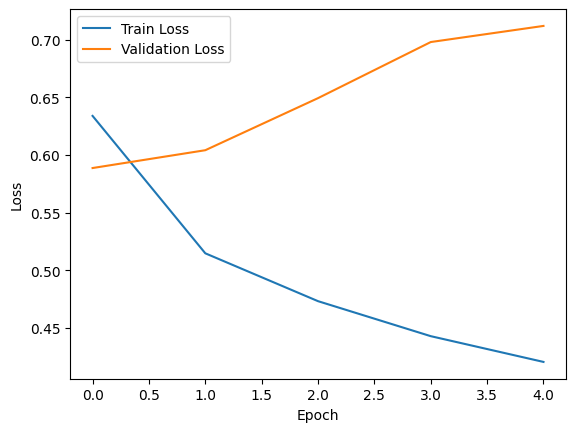

In [41]:
# plot the training and validation losses
import matplotlib.pyplot as plt

plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [42]:
# Test model in test set
# Just run one time!

model.load_state_dict(best_model)
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test)
    test_mse = loss_fn(y_test_pred, y_test)
    print(f'Final Test MSE: {test_mse.item()}')

AttributeError: 'LinearRegression' object has no attribute 'load_state_dict'